In [1]:
from windisch import *
import numpy as np
import xarray as xr
import pandas as pd

In [31]:
tip = TurbinesInputParameters()
tip.static()
_, array = fill_xarray_from_input_parameters(
    tip,
    scope={
        "year": [2020, ],
        #"size": [8000,],
    }
)
fp = "extra data/era5_mean_2013-2022_month_by_hour_corrected.nc"
wt = WindTurbineModel(
    array,
    #location=(55.0, 12.7),
    wind_data=xr.open_dataset(fp),
    country="DK"
)
wt.set_all()

In [41]:
inv = Inventory(wt)

In [42]:
res = inv.calculate_impacts()

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_65619/1570700623.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


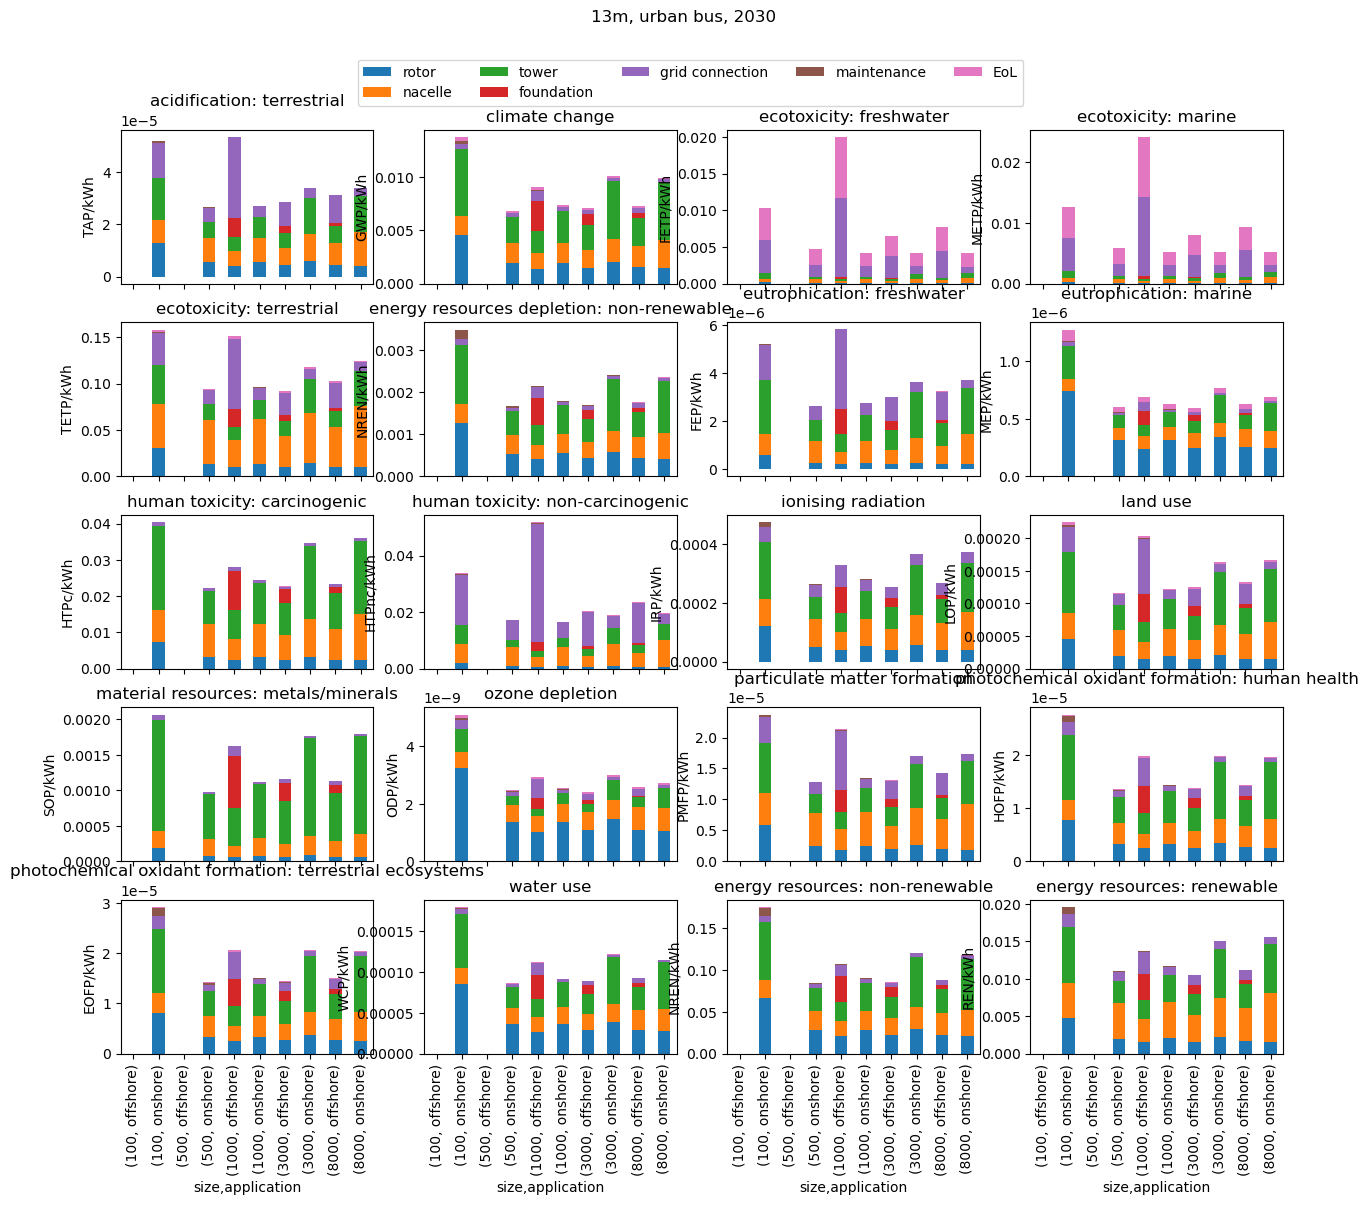

In [45]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(15, 12),
                        sharex=True,
                        nrows=5, ncols=4,
                        gridspec_kw=dict(hspace=0.25)
                       )


targets = zip([x for x in inv.impact_categories.keys() if x != "natural land transformation"], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
            year=2020,
            value=0).to_dataframe("val").unstack()["val"]

    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(inv.impact_categories[key]["unit"] + "/kWh")
    ax.legend().remove()

plt.legend(ncol=5, bbox_to_anchor=(0, 6.5))
plt.tight_layout(pad=1.5)
plt.suptitle("13m, urban bus, 2030")
plt.show()


In [49]:
df

impact               rotor   nacelle     tower  foundation  grid connection  \
size application                                                              
100  offshore     0.000000  0.000000  0.000000    0.000000         0.000000   
     onshore      0.004804  0.004625  0.007484    0.000000         0.001809   
500  offshore     0.000000  0.000000  0.000000    0.000000         0.000000   
     onshore      0.002029  0.004721  0.002980    0.000000         0.001164   
1000 offshore     0.001518  0.003111  0.002550    0.003416         0.003006   
     onshore      0.002041  0.004840  0.003621    0.000000         0.001086   
3000 offshore     0.001613  0.003498  0.002882    0.001230         0.001238   
     onshore      0.002176  0.005318  0.006569    0.000000         0.001019   
8000 offshore     0.001636  0.004467  0.003184    0.000547         0.001372   
     onshore      0.001561  0.006514  0.006550    0.000000         0.000980   

impact            maintenance       EoL  
size application                         
100  offshore        0.000000  0.000000  
     onshore         0.000848  0.000034  
500  offshore        0.000000  0.000000  
     onshore         0.000170  0.000004  
1000 offshore        0.000074  0.000047  
     onshore         0.000085  0.000006  
3000 offshore        0.000025  0.000031  
     onshore         0.000028  0.000018  
8000 offshore        0.000009  0.000031  
     onshore         0.000011  0.000013

In [4]:
inv = i.export_lci()

Missing reference for treatment of high-voltage transformer, for wind turbine
Missing reference for grid connector production, per kg of copper, for wind turbine
Missing reference for treatment of platform, for offshore wind turbine
Missing reference for electronic cabinet production, for wind turbine
Missing reference for tower production, for onshore wind turbine
Missing reference for platform production, for onshore wind turbine
Missing reference for treatment of tower, for onshore wind turbine
Missing reference for high-voltage transformer production, for wind turbine
Missing reference for treatment of platform, for onshore wind turbine
Missing reference for platform production, for offshore wind turbine
Missing reference for treatment of grid connector, for wind turbine
Missing reference for treatment of electronic cabinet, for wind turbine
Missing reference for treatment of medium-voltage transformer, for wind turbine
Missing reference for treatment of rotor, for onshore wind tur

In [5]:
import bw2data
bw2data.projects.set_current("ecoinvent-3.10-cutoff")

In [6]:
inv.apply_strategies()

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: assign_only_product_as_production
Applying strategy: strip_biosphere_exc_locations
Applied 4 strategies in 0.00 seconds


In [7]:
inv.match_database(fields=["name", "reference product", "unit", "location"])
inv.match_database("ecoinvent-3.10.1-cutoff", fields=["name", "reference product", "unit", "location"])

Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields


In [8]:
inv.statistics()

26 datasets
182 exchanges
0 unlinked exchanges
  


(26, 182, 0)

In [9]:
if "windisch_lci_20250212_2020" in bw2data.databases:
    del bw2data.databases["windisch_lci_20250212_2020"]
inv.write_database()

Title: Writing activities to SQLite3 database:
  Started: 02/12/2025 19:47:27
  Finished: 02/12/2025 19:47:27
  Total time elapsed: 00:00:00
  CPU %: 99.10
  Memory %: 1.60
Created database: windisch_lci_20250212_2020


Brightway2 SQLiteBackend: windisch_lci_20250212_2020

In [11]:
wt["cable mass"]

<xarray.DataArray (size: 1, application: 2, year: 1, value: 1)> Size: 16B
array([[[[1.11223028e+07]],

        [[2.16740656e+02]]]])
Coordinates:
  * size         (size) int64 8B 8000
  * application  (application) <U8 64B 'offshore' 'onshore'
    parameter    <U36 144B 'cable mass'
  * year         (year) int64 8B 2020
  * value        (value) int64 8B 0